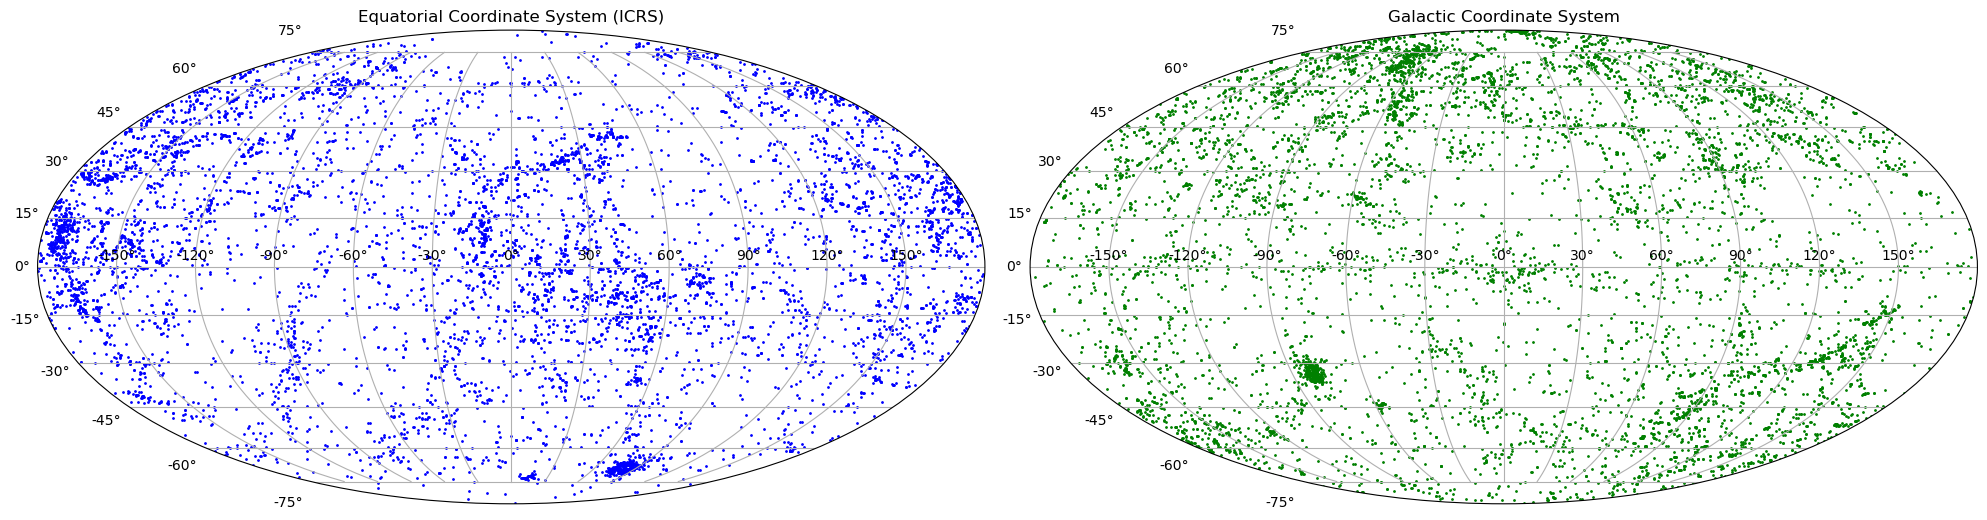

In [34]:
#task1_2.分别在赤道坐标系和银道坐标系画出天球位置分布(可以适当阐述分布特征:如是否有成团性)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

# 1. 从CSV文件中读取天体的RA和Dec
ngc_data = pd.read_csv('ngc_positions.csv')  # 假设文件在当前目录中

# 2. 提取赤经（RA）和赤纬（Dec）信息
ra = ngc_data['RA'].values  # 赤经 (单位：度)
dec = ngc_data['Dec'].values  # 赤纬 (单位：度)

# 3. 使用SkyCoord对象将赤经和赤纬转换为天球坐标（ICRS, 赤道坐标系）
coords_icrs = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')

# 4. 转换为银道坐标系
coords_galactic = coords_icrs.galactic

# 5. 绘制赤道坐标系和银道坐标系的天体分布

# 创建子图，使用Mollweide投影
fig, axs = plt.subplots(1, 2, figsize=(20, 12), subplot_kw={'projection': 'mollweide'})

# 5.1. 绘制赤道坐标系中的天体分布
# 将RA转换为弧度，并将范围转换到(-180, 180)适应Mollweide投影
ra_rad = np.deg2rad(coords_icrs.ra.wrap_at(180 * u.deg).degree)
dec_rad = np.deg2rad(coords_icrs.dec.degree)

axs[0].scatter(ra_rad, dec_rad, s=1, color='blue')
axs[0].set_title('Equatorial Coordinate System (ICRS)', fontsize=12)
axs[0].grid(True)

# 5.2. 绘制银道坐标系中的天体分布
# 将银道坐标系的 l 和 b 转换为弧度，并将 l 范围转换到(-180, 180) 适应Mollweide投影
l_rad = np.deg2rad(coords_galactic.l.wrap_at(180 * u.deg).degree)
b_rad = np.deg2rad(coords_galactic.b.degree)

axs[1].scatter(l_rad, b_rad, s=1, color='green')
axs[1].set_title('Galactic Coordinate System', fontsize=12)
axs[1].grid(True)

# 6. 显示图像
plt.tight_layout()
plt.show()


#NGC 天体的分布特点
#不均匀性：NGC 天体的分布并非随机或均匀的，而是与宇宙中的大规模结构相关。这些天体在天空中的分布取决于它们的距离和所在的宇宙环境。

#银河系影响：由于银河系的影响，在赤道坐标系中（以地球的赤道面为基准），靠近银河盘面的区域由于恒星、气体和尘埃的遮挡，
#NGC天体的数量相对较少。这个区域通常被称为“银河屏障”，在那里我们很难观察到银河系以外的天体。

#成团性：NGC天体中有许多是星系，而星系有强烈的成团性。星系在宇宙中往往不是孤立的，它们通常成群或形成超星系团。
#这意味着 NGC天体的分布在某些区域会非常密集，例如星系团的区域，而在其他区域则可能相对稀疏。

#银道坐标系中的分布：天体在银河平面附近的稀疏分布，这些区域可能被银河系的物质遮挡。

#赤道坐标系中的分布：某些区域会出现密集的星系聚集区，而某些区域则相对稀疏。星系分布与大尺度结构的对应关系。

In [ ]:
### good，最好能查看一下，哪个区域是哪个星系团，比如Virgo，Coma这样的著名星系团在哪里

In [8]:
# task1_3. Heapix分区NSIDE至少为多少时，保证每个pixel中只有一个星系?

import healpy as hp 
NSIDE = 32
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

# NSIDE = 32 对应的总像素数为 12288，比星系的总数 7840 要多，因此可以确保每个像素中最多只有一个星系.

12288


## 实际情况是有些星系距离很近，会分在一个pixel里面

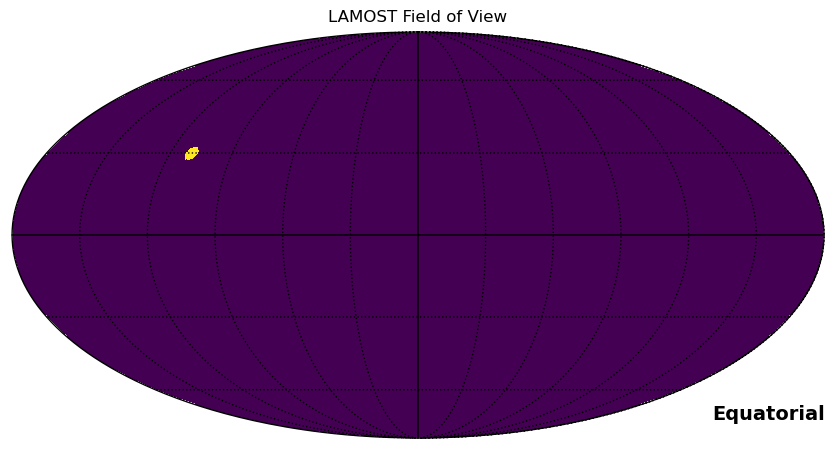

In [37]:
# task2_1. LAMOST的视场半径2.5度，某次观测视场中心为 (Ra，Dec) =(110，30)，请在天球坐标中准确画出LAMOST的视场观测范围。(选做)

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

# LAMOST 的视场半径和中心点 (Ra, Dec)
ra_center = 110.0  # 赤经中心 (度)
dec_center = 30.0  # 赤纬中心 (度)
fov_radius = 2.5  # 视场半径 (度)

# 将中心点转换为弧度，以适应 healpy 的坐标系
center = SkyCoord(ra=ra_center*u.deg, dec=dec_center*u.deg, frame='icrs')
theta_center = np.radians(90.0 - center.dec.degree)  # 转换为天球坐标的 theta
phi_center = np.radians(center.ra.degree)  # 转换为天球坐标的 phi

# Healpy 图的分辨率
nside = 128  # 分辨率越高，图越精细
npix = hp.nside2npix(nside)

# 创建一个空的天球图，值全部为 0
sky_map = np.zeros(npix)

# 将 LAMOST 视场范围内的像素填充为 1
# fov_radius 转换为弧度
fov_radius_rad = np.radians(fov_radius)
vec_center = hp.ang2vec(theta_center, phi_center)
pix_indices = hp.query_disc(nside, vec_center, fov_radius_rad)
sky_map[pix_indices] = 1

# 使用 healpy 的 mollweide 投影绘制天球图
hp.mollview(sky_map, coord=['C'], title="LAMOST Field of View", cbar=False)

# 添加网格
hp.graticule()

# 显示绘图
plt.show()


In [ ]:
### OK的
### 坐标系转换 http://cluster.shao.ac.cn/~shen/Lecture/change_cor.pro

In [35]:
#task2_2. 银河系的光度大概是1011 太阳光度，半光度半径Re大约是5Kpc。(太阳的V波段绝对星等是4.8等)如果银河系距离观测者的距离是100kpc,
#其视星等和Re 的视尺度(apparent size)各是多少?Re内的平均表面亮度是多少?如果距离是1Mpc呢?

import math

def calculate_galaxy_properties(distance_kpc, L_sun=1e11, Re_kpc=5, M_sun=4.8):
    # 常量
    pc_per_kpc = 1e3  # 每千秒差距的秒差距数
    arcmin_per_radian = 180 * 60 / math.pi

    # 计算距离模数
    DM = 5 * math.log10(distance_kpc * pc_per_kpc / 10)
    
    # 计算视星等
    m = M_sun + DM

    # 计算视尺度（角度）
    theta_radians = Re_kpc / distance_kpc
    theta_arcmin = theta_radians * arcmin_per_radian
    
    # 计算视亮度
    L_d = L_sun * 10**(0.4 * (M_sun - m))
    
    # 计算Re内的平均表面亮度
    surface_brightness = L_d / (2 * math.pi * Re_kpc**2)
    
    return m, theta_arcmin, surface_brightness

# 设置距离
distances_kpc = [100, 1000]

for distance in distances_kpc:
    m, theta_arcmin, surface_brightness = calculate_galaxy_properties(distance)
    print(f"距离: {distance} kpc")
    print(f"视星等: {m:.2f}")
    print(f"视尺度: {theta_arcmin:.2f} arcsec")
    print(f"Re内的平均表面亮度: {surface_brightness:.2f} 太阳光度/平方 kpc")
    print()


距离: 100 kpc
视星等: 24.80
视尺度: 171.89 arcsec
Re内的平均表面亮度: 6.37 太阳光度/平方 kpc

距离: 1000 kpc
视星等: 29.80
视尺度: 17.19 arcsec
Re内的平均表面亮度: 0.06 太阳光度/平方 kpc



## 单位需要是星等/平方角秒，且与距离无关